DEVELOPED BY TUFARINI EMANUELE |
emanuele.tufarini@live.com |
3245606745

Rev. 2020-04-15

If the notebook causes problems running it locally with Geany (or similar)

IMPORTA IL FILE EXCEL

In [0]:
from google.colab import files
uploaded = files.upload()

Saving confirmed_region.xlsx to confirmed_region.xlsx


INSTALLA LE LIBRERIE

In [0]:
!pip install matplotlib
!pip install COVID19Py
!pip install pandas
!pip install xlrd

IMPORTA I MODULI

In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import csv
import os

IMPOSTA LA DATA

In [0]:
# +1 italy time zone > str( int (data.hour + 1))
data_day = datetime.datetime.now()
data_day = (str(data_day.year) + "-" + str(data_day.month) + "-" + \
       str(data_day.day))

print (data_day)

2020-4-15


ESPORTA I DATI PER LA PRIMA REGIONE

In [0]:
# I REGION
# 
# 0 DATA | 1 VDA | 2 LIG | 3 PIE | 4 LOM | 5 VEN | 6 TN | 7 BZ | 8 FVG | 9 EMR
# 10 MAR | 11 TOS | 12 UMB | 13 LAZ | 14 ABR | 15 MOL | 16 CAM | 17 BAS | 18 PUG
# 19 CAL | 20 SIC | 21 SAR
# https://en.m.wikipedia.org/wiki/Template:2019%E2%80%9320_coronavirus_
# pandemic_data/Italy_medical_cases
# 
# 

# insert region
region = 13

# insert file name
name = r'confirmed_region'
extension = '.xlsx'
read_file = pd.read_excel (name + extension)
name = name.lower()


read_file.to_csv (name + '.csv', index = None, header=True)
# delete first line of csv
lines = open(name + '.csv', 'r').readlines()
del lines[0:4]
open(name + '.csv', 'w').writelines(lines)

#
#
# process the csv
#
#

name = 'confirmed_region.csv'

with open(name, 'r') as infile, open('new_' + name, 'w') as outfile:
	writer = csv.writer(outfile)
	newrow_list = ["date","confirmed",]
	writer.writerow(newrow_list)

	reader = csv.reader(infile)
	for row in reader:
		newrow_list[0] = row[0]
		newrow_list[1] = row[region]

		if row[region] == '':
			newrow_list[1] = '0'

		writer.writerow(newrow_list)
	
		confirmed_region = open ('confirmed_region.txt','w')
		
		confirmed_region.write(newrow_list[0])
  
#
#
# convert csv in txt - contains data
#
#

csv_file = 'new_' + name
txt_file = 'data.txt'
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') \
         for row in csv.reader(my_input_file)]
    my_output_file.close()

with open('data.txt', 'r', encoding='utf-8') as inFile,\
     open('new_data.txt', 'w', encoding='utf-8') as outFile:
    for line in inFile:
        if line.strip():
            outFile.write(line)
            
lines = open('new_data' + '.txt', 'r').readlines()
del lines[-6:]
open('new_data' + '.txt', 'w').writelines(lines)

filein = open ("new_data.txt","r")

file_data = open ("only_data.txt","w")
file_confirmed = open ("only_confirmed.txt","w")

for l in filein:
	data = (l[:10])
	file_data.write(data.strip() + "\n")
			
	confirmed = (l[20:])
	file_confirmed.write(confirmed.strip() + "\n")

file_data.close()
file_confirmed.close()

# delete the first line
with open("only_data.txt", 'r') as fin:
  data = fin.read().splitlines(True)
with open("only_data.txt", 'w') as fout:
  fout.writelines(data[1:])


with open("only_confirmed.txt", 'r') as fin:
  data = fin.read().splitlines(True)
with open("only_confirmed.txt", 'w') as fout:
  fout.writelines(data[1:])

List = open("only_confirmed.txt").readlines()
List = [x.replace('\n', '') for x in List]

with open("only_confirmed.txt", 'w') as fin:

	for l in List:
		p = ")"
		if p in l:
			fin.write(l[l.index(p)+2:] + "\n")
		else:
			fin.write(l + "\n")
	
List = open("only_confirmed.txt").readlines()
List = [x.replace('\n', '') for x in List]
List = [x.replace(',', '') for x in List]	
List = [x.replace('–', '-') for x in List]
# convert the elements in the list to int

for i in range(0, len(List)): 
  List[i] = int(List[i]) 
    
List_data = open("only_data.txt").readlines()
List_data = [x.replace('\n', '') for x in List_data]

print (List)

CREA IL GRAFICO PER LA REGIONE

2020-4-15


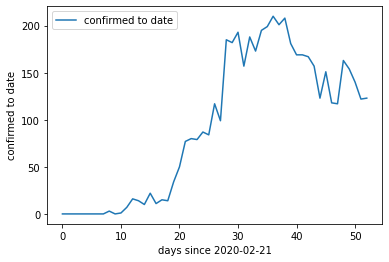

In [0]:
print (data_day)

#
#
# graph by region
#
# 

plt.plot(List, label="confirmed to date")
plt.ylabel("confirmed to date")
plt.xlabel("days since 2020-02-21")
plt.legend() 

plt.show()

ESPORTA I DATI DELLA SECONDA REGIONE PER EFFETTUARE UN CONFRONTO

In [0]:
# II REGION
# 
# 0 DATA | 1 VDA | 2 LIG | 3 PIE | 4 LOM | 5 VEN | 6 TN | 7 BZ | 8 FVG | 9 EMR
# 10 MAR | 11 TOS | 12 UMB | 13 LAZ | 14 ABR | 15 MOL | 16 CAM | 17 BAS | 18 PUG
# 19 CAL | 20 SIC | 21 SAR
# https://en.m.wikipedia.org/wiki/Template:2019%E2%80%9320_coronavirus_
# pandemic_data/Italy_medical_cases
# 
# 

# insert region
region = 5

# insert file name
name = r'confirmed_region'
extension = '.xlsx'
read_file = pd.read_excel (name + extension)
name = name.lower()


read_file.to_csv (name + '.csv', index = None, header=True)
# delete first line of csv
lines = open(name + '.csv', 'r').readlines()
del lines[0:4]
open(name + '.csv', 'w').writelines(lines)

#
#
# process the csv
#
#

name = 'confirmed_region.csv'

with open(name, 'r') as infile, open('new_' + name, 'w') as outfile:
	writer = csv.writer(outfile)
	newrow_List_2 = ["date","confirmed",]
	writer.writerow(newrow_List_2)

	reader = csv.reader(infile)
	for row in reader:
		newrow_List_2[0] = row[0]
		newrow_List_2[1] = row[region]

		if row[region] == '':
			newrow_List_2[1] = '0'

		writer.writerow(newrow_List_2)
	
		confirmed_region = open ('confirmed_region.txt','w')
		
		confirmed_region.write(newrow_List_2[0])
  
#
#
# convert csv in txt - contains data
#
#

csv_file = 'new_' + name
txt_file = 'data.txt'
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') \
         for row in csv.reader(my_input_file)]
    my_output_file.close()

with open('data.txt', 'r', encoding='utf-8') as inFile,\
     open('new_data.txt', 'w', encoding='utf-8') as outFile:
    for line in inFile:
        if line.strip():
            outFile.write(line)
            
lines = open('new_data' + '.txt', 'r').readlines()
del lines[-6:]
open('new_data' + '.txt', 'w').writelines(lines)

filein = open ("new_data.txt","r")

file_data = open ("only_data2.txt","w")
file_confirmed = open ("only_confirmed2.txt","w")

for l in filein:
	data = (l[:10])
	file_data.write(data.strip() + "\n")
			
	confirmed = (l[20:])
	file_confirmed.write(confirmed.strip() + "\n")

file_data.close()
file_confirmed.close()

# delete the first line
with open("only_data2.txt", 'r') as fin:
  data = fin.read().splitlines(True)
with open("only_data2.txt", 'w') as fout:
  fout.writelines(data[1:])


with open("only_confirmed2.txt", 'r') as fin:
  data = fin.read().splitlines(True)
with open("only_confirmed2.txt", 'w') as fout:
  fout.writelines(data[1:])

List_2 = open("only_confirmed2.txt").readlines()
List_2 = [x.replace('\n', '') for x in List_2]

with open("only_confirmed2.txt", 'w') as fin:

	for l in List_2:
		p = ")"
		if p in l:
			fin.write(l[l.index(p)+2:] + "\n")
		else:
			fin.write(l + "\n")
	
List_2 = open("only_confirmed2.txt").readlines()
List_2 = [x.replace('\n', '') for x in List_2]
List_2 = [x.replace(',', '') for x in List_2]	
List_2 = [x.replace('–', '-') for x in List_2]
# convert the elements in the List_2 to int

for i in range(0, len(List_2)): 
  List_2[i] = int(List_2[i]) 
    
List_2_data = open("only_data2.txt").readlines()
List_2_data = [x.replace('\n', '') for x in List_2_data]

print (List_2)

[2, 16, 7, 7, 11, 28, 40, 40, 40, 72, 10, 34, 53, 47, 81, 55, 127, 74, 112, 167, 361, 211, 342, 235, 301, 231, 510, 270, 547, 586, 505, 383, 443, 494, 493, 562, 433, 428, 366, 431, 470, 486, 353, 360, 402, 362, 337, 485, 523, 488, 347, 309, 174]


CONFRONTA DUE REGIONI

2020-4-15


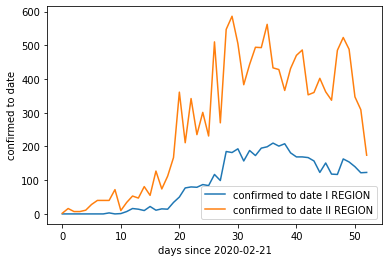

In [0]:
print (data_day)

#
#
# comparison by region
#
# 

plt.plot(List, label="confirmed to date I REGION")
plt.plot(List_2, label="confirmed to date II REGION")
plt.ylabel("confirmed to date")
plt.xlabel("days since 2020-02-21")
plt.legend() 

plt.show()

CANCELLARE FILE NON NECESSARI

In [0]:
os.remove('confirmed_region.csv')
os.remove('new_confirmed_region.csv')
os.remove('confirmed_region.txt')
os.remove('data.txt')
os.remove('new_data.txt')